In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('fraud_dataset_example.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [26]:
print(df['type'].unique())
print(df['step'].unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
[ 1  2  3  4  5  6  7  8  9 10]


In [27]:
df.drop(['nameOrig','nameDest','isFraud','isFlaggedFraud'], axis=1, inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0


In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_encode=LabelEncoder()

In [30]:
df["type"]=label_encode.fit_transform(df["type"])
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9839.64,170136.0,160296.36,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0


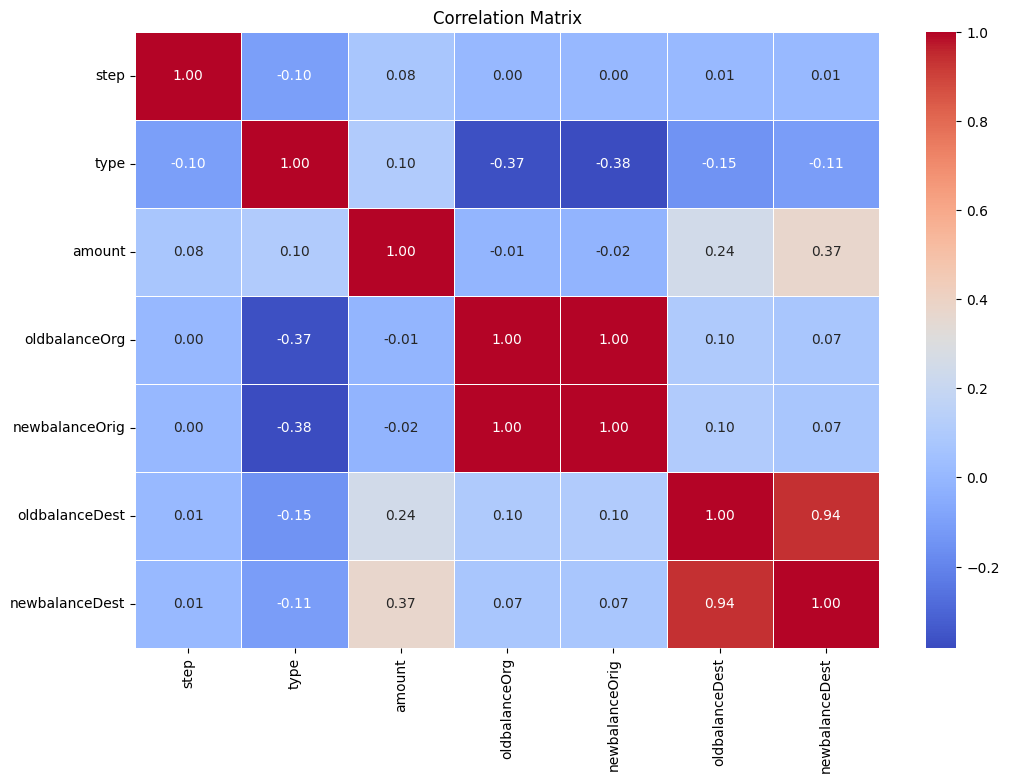

In [31]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [34]:
selected_features1 = df[['oldbalanceOrg', 'newbalanceOrig']]
selected_features2 = df[['oldbalanceDest', 'newbalanceDest']]

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features1 = scaler.fit_transform(selected_features1)
scaled_features2 = scaler.fit_transform(selected_features2)

In [36]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=1) 
pca_result1 = pca.fit_transform(scaled_features1)
pca_result2 = pca.fit_transform(scaled_features2)

In [43]:
pca_result1

array([[-0.37239963],
       [-0.44435672],
       [-0.45440208],
       ...,
       [-0.45444731],
       [-0.45404622],
       [-0.44666718]])

In [44]:
df['pca_result1'] = pca_result1
df['pca_result2'] = pca_result2

In [46]:
X=df[["step","type","amount","pca_result1","pca_result2"]]

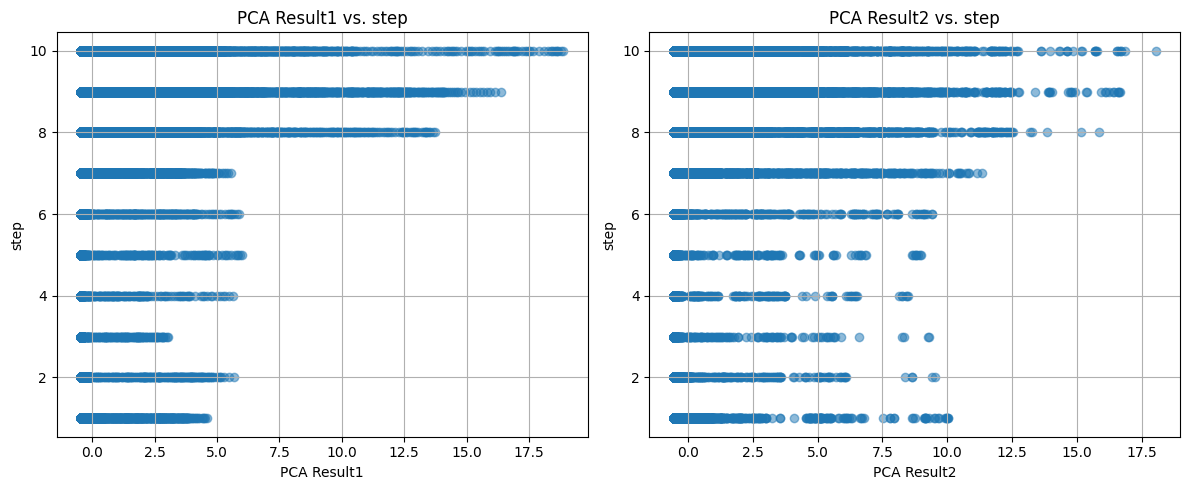

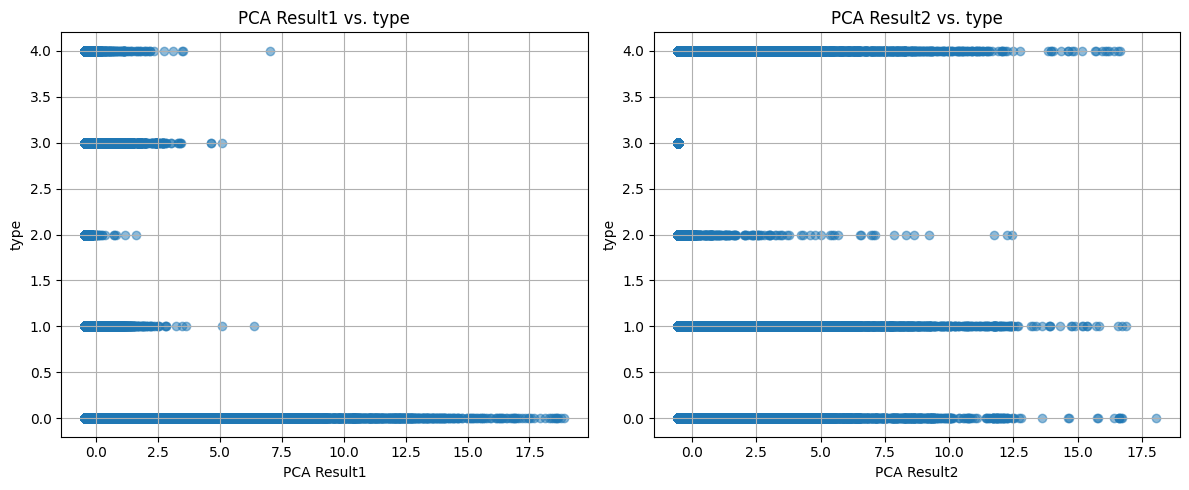

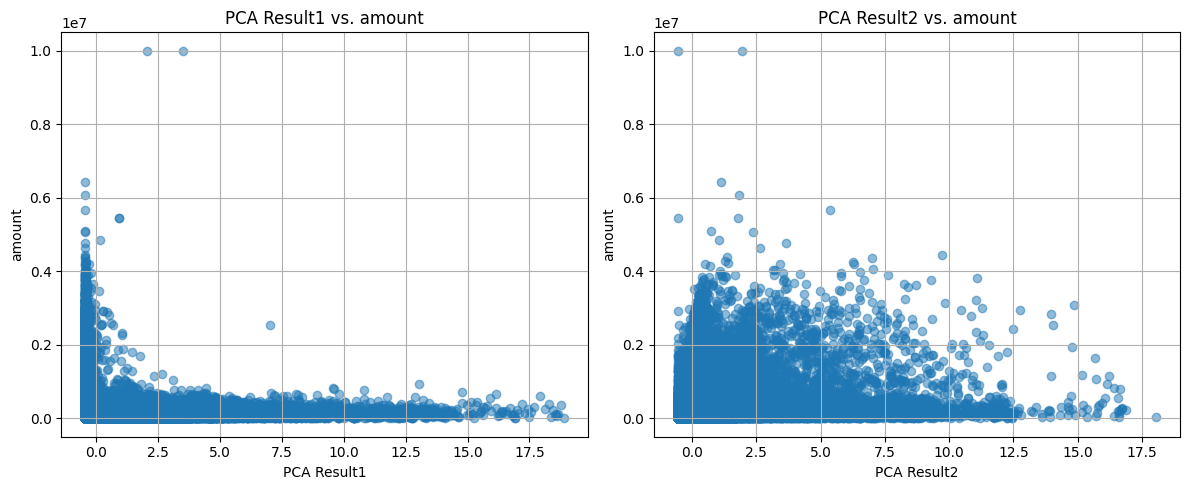

In [52]:
for i in ["step", "type", "amount"]:
    plt.figure(figsize=(12, 5))

    # Subplot for pca_result1
    plt.subplot(1, 2, 1)
    plt.scatter(X['pca_result1'], X[i], alpha=0.5)
    plt.title('PCA Result1 vs. ' + i)
    plt.xlabel('PCA Result1')
    plt.ylabel(i)
    plt.grid(True)

    # Subplot for pca_result2
    plt.subplot(1, 2, 2)
    plt.scatter(X['pca_result2'], X[i], alpha=0.5)
    plt.title('PCA Result2 vs. ' + i)
    plt.xlabel('PCA Result2')
    plt.ylabel(i)
    plt.grid(True)

    # Adjust layout for better spacing
    plt.tight_layout()

    plt.show()